**Notebook Overview**

In this notebook, we explore the Heart Disease dataset, which contains medical records for over 4,000 patients. Our goal is to understand how various clinical variables and risk factors influence the occurrence of heart disease.

We will focus our analysis on several key parameters, including cholesterol, glucose, BMI, gender, age, smoking habits, and diabetes. To start, we will preprocess the data, visualize relationships, and identify trends. Later, we will build classification models to predict heart disease using the available data.

The models will be evaluated based on metrics like accuracy and log loss. Overall, this notebook aims to uncover insights into how patient attributes and risk factors impact heart disease risk based on real medical data.

### Importing necessary libraries


In [1]:
# data processing, linear algebra
import numpy as np                
import pandas as pd

# data visualization & graphical plotting
import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('heart_disease.csv')

In [3]:
## Quick look at the dataset
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.00,0.00,no,0,0,195.00,106.00,70.00,26.97,80.00,77.00,No
1,Female,46,primaryschool,0,0.00,0.00,no,0,0,250.00,121.00,81.00,28.73,95.00,76.00,No
2,Male,48,uneducated,1,20.00,0.00,no,0,0,245.00,127.50,80.00,25.34,75.00,70.00,No
3,Female,61,graduate,1,30.00,0.00,no,1,0,225.00,150.00,95.00,28.58,65.00,103.00,yes
4,Female,46,graduate,1,23.00,0.00,no,0,0,285.00,130.00,84.00,23.10,85.00,85.00,No


#### Data preprocessing

In [4]:
# Understanding data

print("Dataset Shape: {}".format(df.shape))
print("\nDataset Columns: \n{}".format(df.columns.to_list()))
print("\nTotal Records: {}".format(len(df))) 
print("\nTotal Features: {}".format(df.shape[1]))
print("\nTotal Values: {}".format(df.count().sum()))
print("\nTotal Missing Values: {}".format(df.isna().sum().sum()))

Dataset Shape: (4238, 16)

Dataset Columns: 
['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke']

Total Records: 4238

Total Features: 16

Total Values: 67163

Total Missing Values: 645




#### As we can see our dataset has some missing values. Find the columns where they are.


In [5]:
# Examine null values in each feature
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print(missing_cols)

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64




#### Inspecting datatypes using info() to understand features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [7]:
# Impute missing data in continuous variables

df.glucose.fillna(df.glucose.median(),inplace = True)
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace = True)
df.totChol.fillna(df.totChol.median(),inplace = True)
df.BMI.fillna(df.BMI.median(),inplace = True)
df.heartRate.fillna(df.heartRate.median(),inplace = True)

## Similarly for categorical variables

df.education = df.education.fillna(df.education.mode().iloc[0])
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])

pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

 **Missing values** have been imputed, dataset is ready for analysis

In [8]:
df = df.rename(columns={'Heart_ stroke': 'Heart_stroke'})

In [9]:
# Print unique values in each categorical feature
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
  print(f"\nUnique values in {col}: \n{df[col].unique()}")


Unique values in Gender: 
['Male' 'Female']

Unique values in education: 
['postgraduate' 'primaryschool' 'uneducated' 'graduate']

Unique values in prevalentStroke: 
['no' 'yes']

Unique values in Heart_stroke: 
['No' 'yes']


In [10]:
## Let's rename the education feature labels, to keep them short in visuals

#df.replace({'education' : {'postgraduate': 'pGrad', 'primaryschool': 'priSch', 'uneducated' : 'unEdu', 'graduate' : 'Grad'}}, inplace=True)
#df.education.unique()


# Create dictionary for mapping education labels to abbreviations
edu_map = {'postgraduate': 'pGrad', 
           'primaryschool': 'priSch',  
           'uneducated' : 'unEdu', 
           'graduate' : 'Grad'}

# Replace education labels with abbreviations
df['education'] = df['education'].map(edu_map)

# Verify labels were updated  
print("\nModified Education Labels:\n", df['education'].unique())


Modified Education Labels:
 ['pGrad' 'priSch' 'unEdu' 'Grad']


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,4238,2,Female,2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4238.00,NaN,NaN,NaN,49.58,8.57,32.00,42.00,49.00,56.00,70.00
education,4238,4,unEdu,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentSmoker,4238.00,NaN,NaN,NaN,0.49,0.50,0.00,0.00,0.00,1.00,1.00
cigsPerDay,4238.00,NaN,NaN,NaN,8.94,11.90,0.00,0.00,0.00,20.00,70.00
BPMeds,4238.00,NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
prevalentStroke,4238,2,no,4213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,4238.00,NaN,NaN,NaN,0.31,0.46,0.00,0.00,0.00,1.00,1.00
diabetes,4238.00,NaN,NaN,NaN,0.03,0.16,0.00,0.00,0.00,0.00,1.00
totChol,4238.00,NaN,NaN,NaN,236.69,44.33,107.00,206.00,234.00,262.00,696.00


#### Exploratory Data Analysis

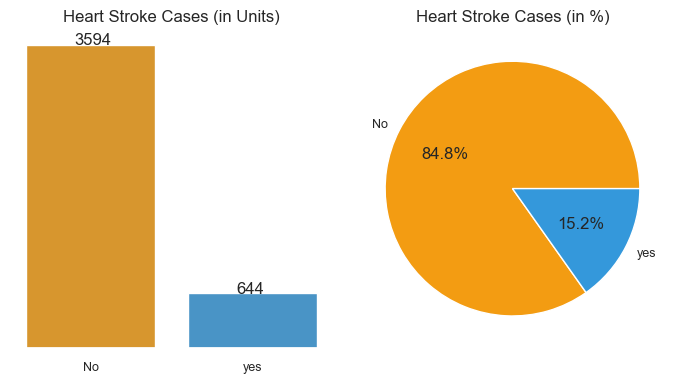

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visualization style and settings
sns.set(rc={'axes.facecolor':'none', 'axes.grid':False, 'xtick.labelsize':9, 'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#F39C12', '#3498DB')  # New color scheme
plt.subplots(figsize=(7, 4))

# Subplot 1: Heart Stroke Cases (in Units)
plt.subplot(1, 2, 1)
plt.title('Heart Stroke Cases (in Units)', fontsize=12)

# Create a count plot for the 'Heart_ stroke' variable
ax = sns.countplot(x="Heart_stroke", data=df, palette=my_col, order=df['Heart_stroke'].value_counts().index)

# Annotate each bar with its respective count
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 8))

plt.ylabel(None)  # No y-axis label
plt.yticks([])    # No y-axis ticks
plt.xlabel(None)  # No x-axis label

# Subplot 2: Heart Stroke Cases (in %)
plt.subplot(1, 2, 2)
plt.title('Heart Stroke Cases (in %)', fontsize=12)

# Create a pie chart for the distribution of 'Heart_ stroke' variable
df['Heart_stroke'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()  # Display the plots


**Analysis**
1) The dataset has an imbalanced distribution for the target
2) Only 15% of cases experienced a heart stroke

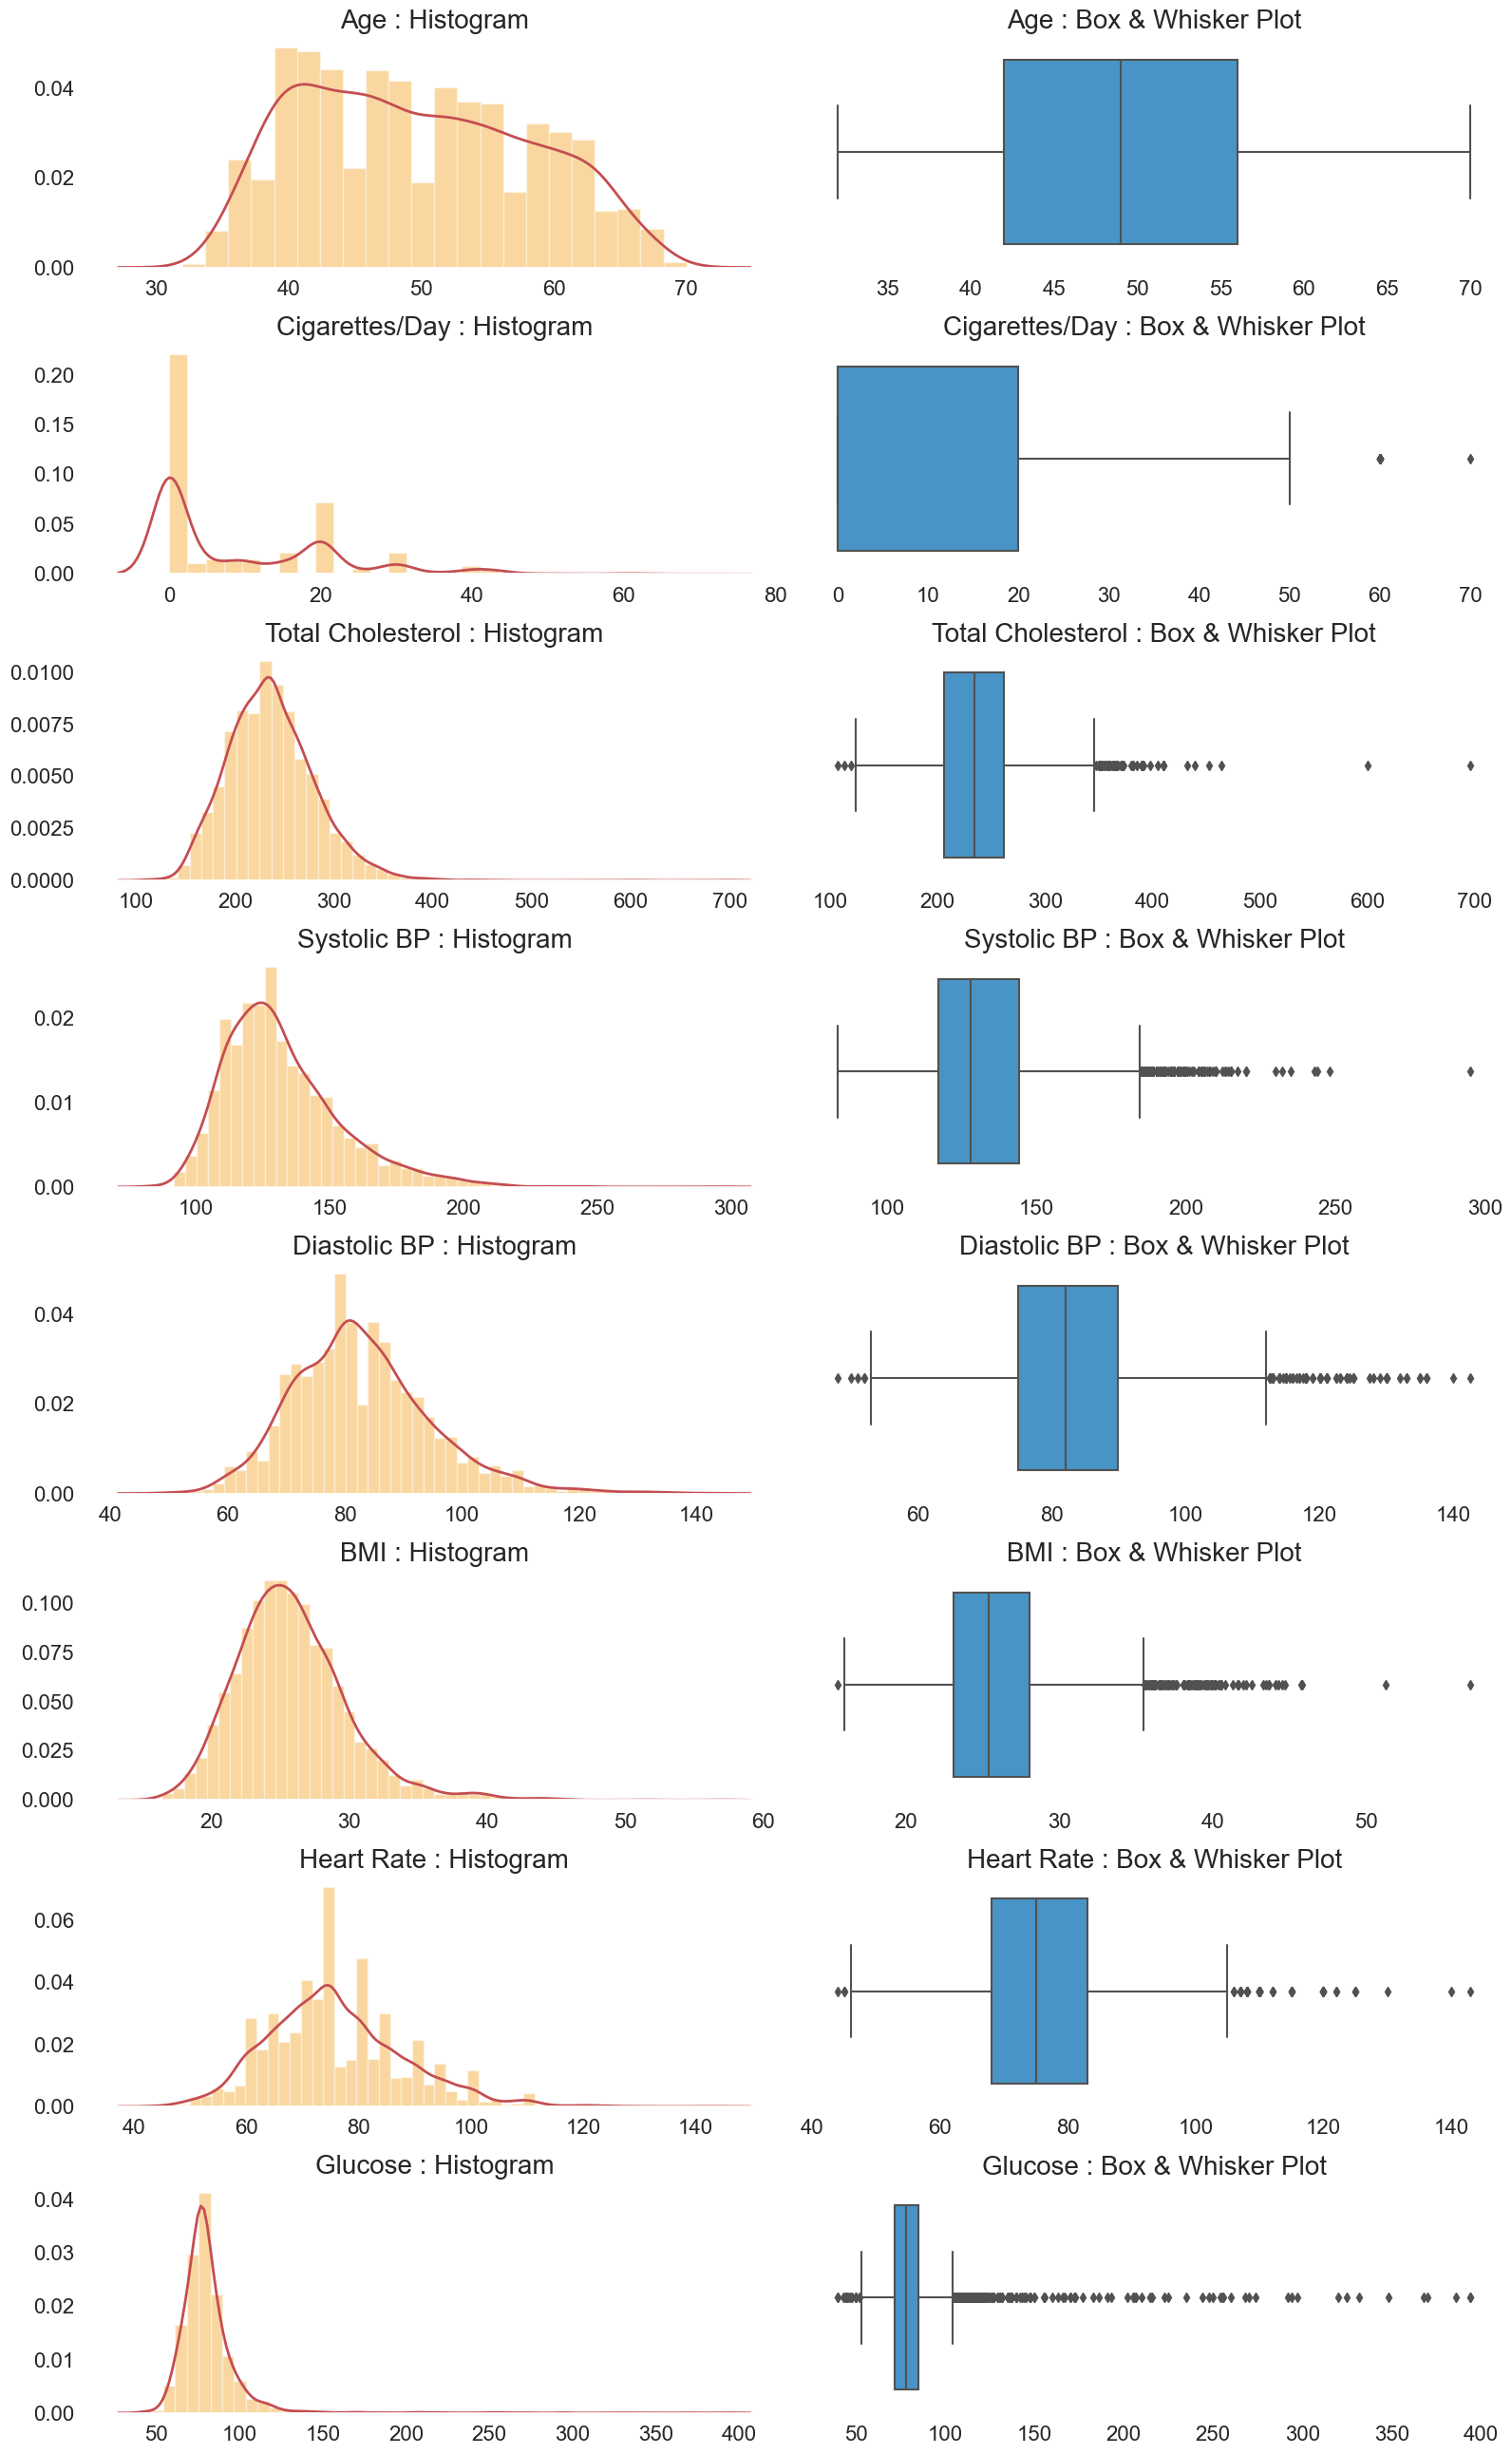

In [13]:
# Set up the visualization style and settings
sns.set(rc={'axes.facecolor': 'none', 'axes.grid': False, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'figure.autolayout': True})
plt.subplots(figsize=(16, 26))

# List of numerical features for visualization
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
num_feature_labels = ['Age', 'Cigarettes/Day', 'Total Cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose']

# Loop through numerical features for visualization
for i in range(len(num_features)):
    feature = num_features[i]
    label = num_feature_labels[i]
    
    # Histogram
    plt.subplot(8, 2, 2 * i + 1)
    plt.title(f'{label} : Histogram', fontsize=20)
    sns.distplot(df[feature], color='#F39C12', kde_kws={'linewidth': 2, 'color': 'r'})
    plt.ylabel(None), plt.xlabel(None)
    
    # Box & Whisker Plot
    plt.subplot(8, 2, 2 * i + 2)
    plt.title(f'{label} : Box & Whisker Plot', fontsize=20)
    sns.boxplot(df[feature], orient="h", color='#3498DB')
    plt.yticks([])

plt.show()


**Analysis**

1) Many features exhibit outliers, reflecting diversity of real patient data.
   Outliers will be retained as they may represent valid but extreme values

2) Features with most outliers: Glucose, Total Cholesterol, Systolic BP, BMI
 

3) Some features show approximate bell curve distribution: 
   Total Cholesterol, BMI, Glucose have distribution close to normal

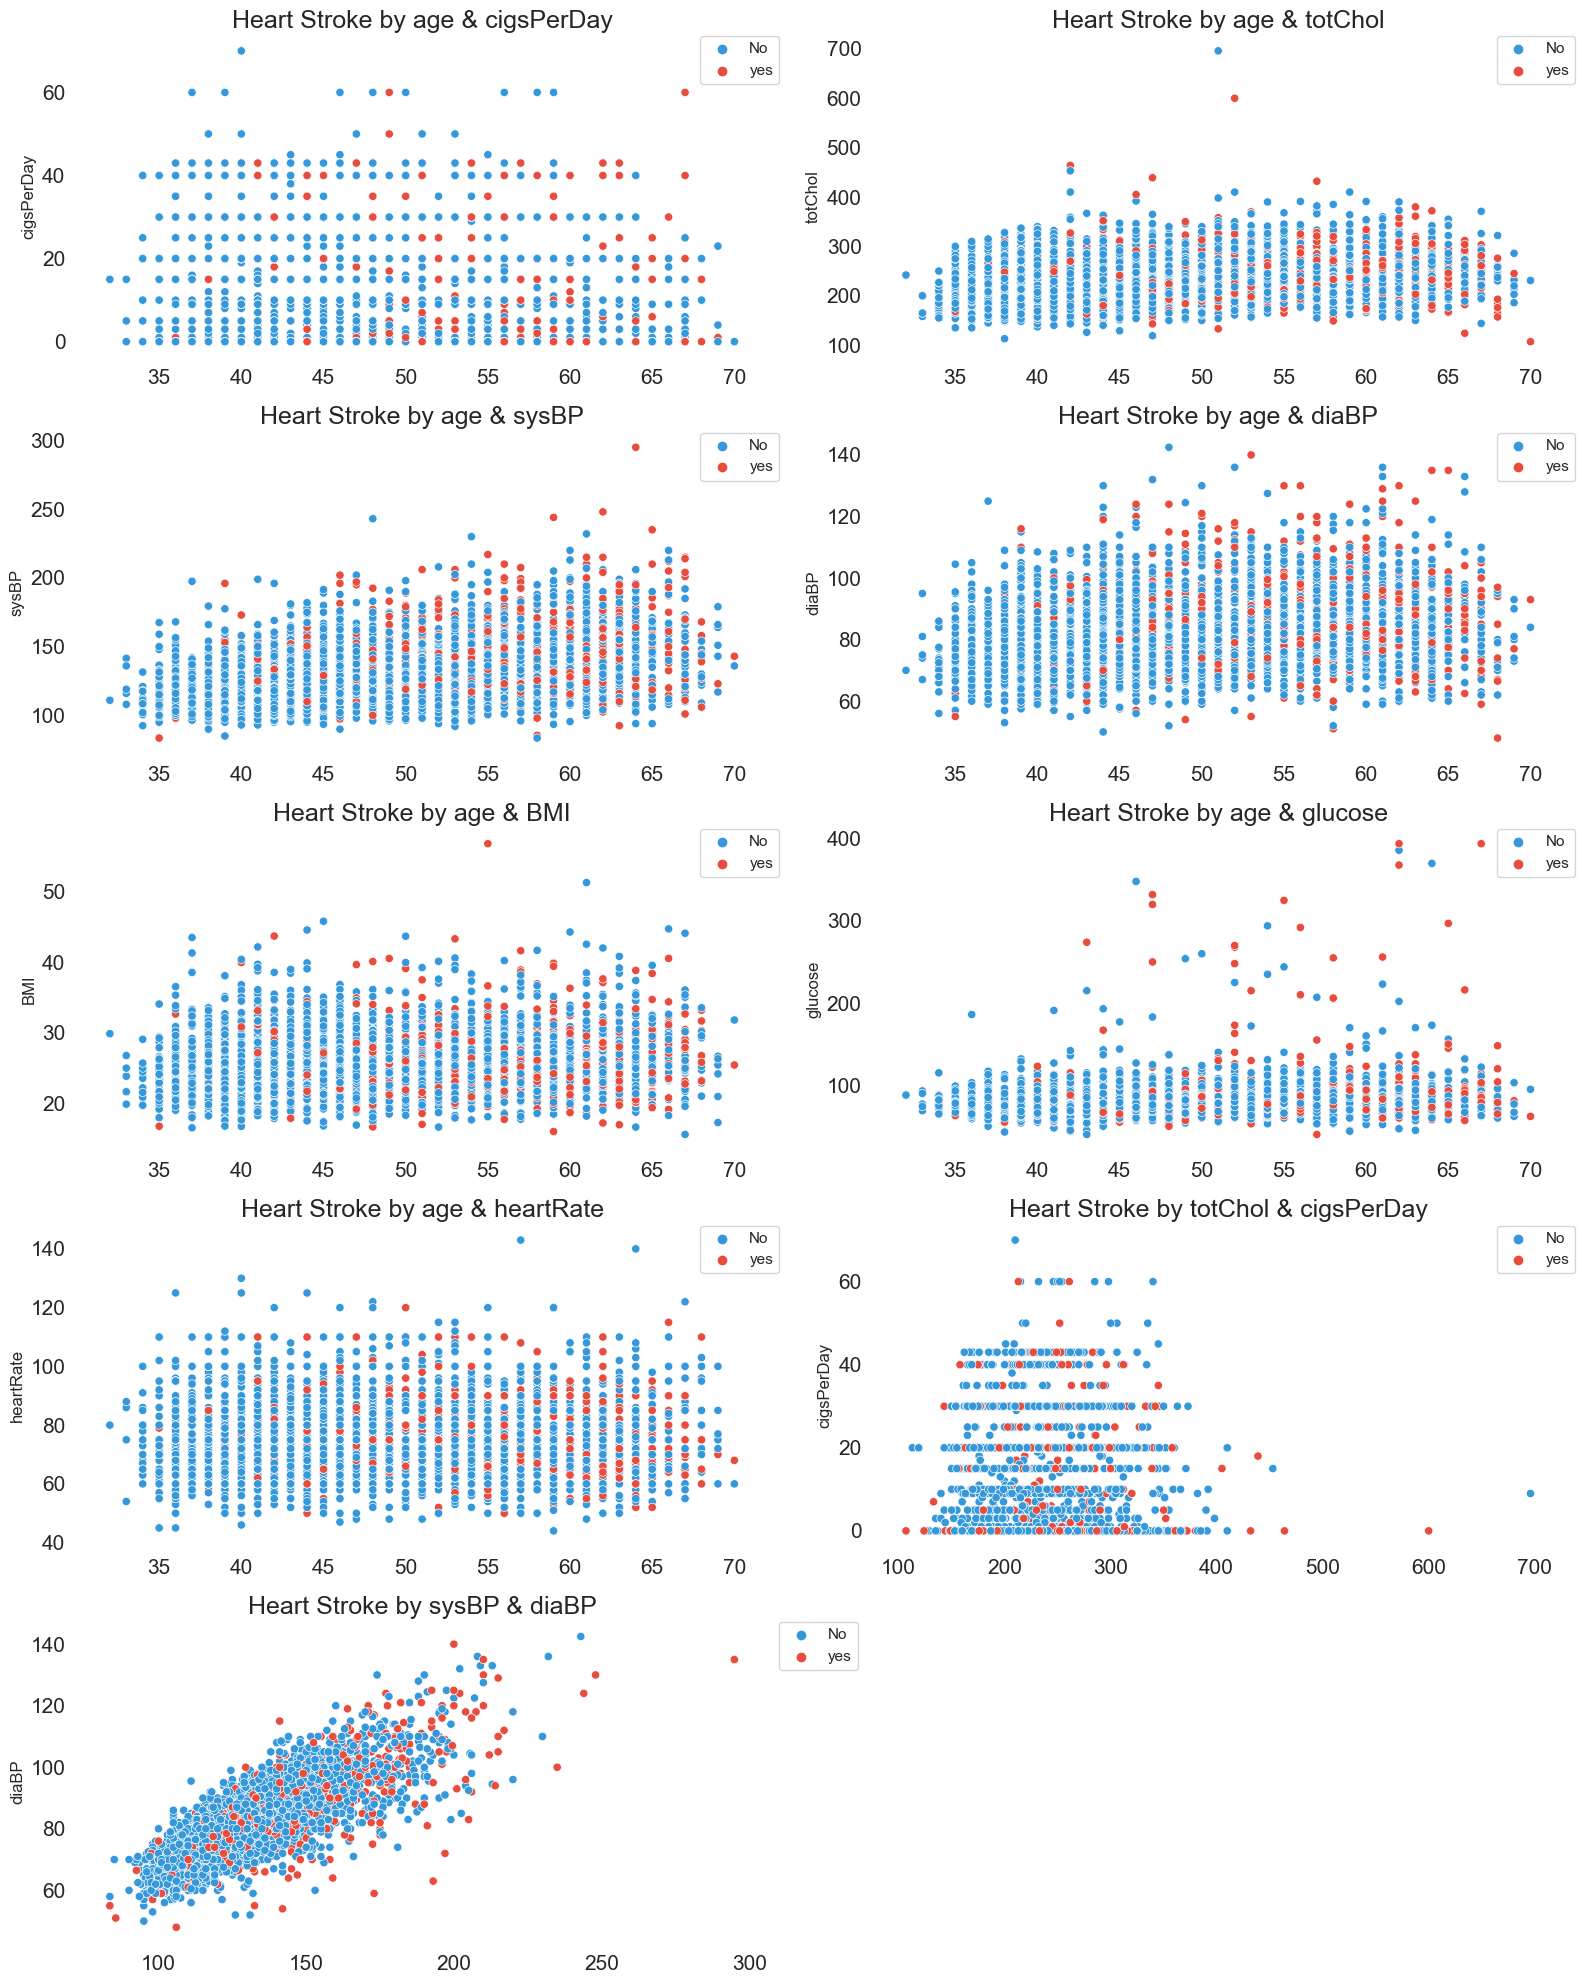

In [14]:
# Set up the visualization style and settings
sns.set(rc={'axes.facecolor': 'none', 'axes.grid': False, 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'figure.autolayout': True})
plt.subplots(figsize=(16, 20))
my_pal = ("#3498DB", "#E74C3C")  # New color scheme

# List of pairs of numerical features for visualization
feature_pairs = [('age', 'cigsPerDay'), ('age', 'totChol'), ('age', 'sysBP'), ('age', 'diaBP'),
                 ('age', 'BMI'), ('age', 'glucose'), ('age', 'heartRate'),
                 ('totChol', 'cigsPerDay'), ('sysBP', 'diaBP')]

# Loop through feature pairs for visualization
for i, (feature1, feature2) in enumerate(feature_pairs, start=1):
    plt.subplot(5, 2, i)
    plt.title(f'Heart Stroke by {feature1} & {feature2}', fontsize=18)
    sns.scatterplot(x=feature1, y=feature2, hue='Heart_stroke', palette=my_pal, data=df)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
    plt.xlabel(None)

plt.tight_layout()
plt.show()


**Analysis**

1) Most numerical features show weak correlation to target variable.
   Among all the other features Diastolic and Systolic BP have the strongest linear relationships 

2) Surprisingly, cholesterol and smoking do not exhibit expected correlation.
   This suggests complex non-linear relationships not visible in scatterplots

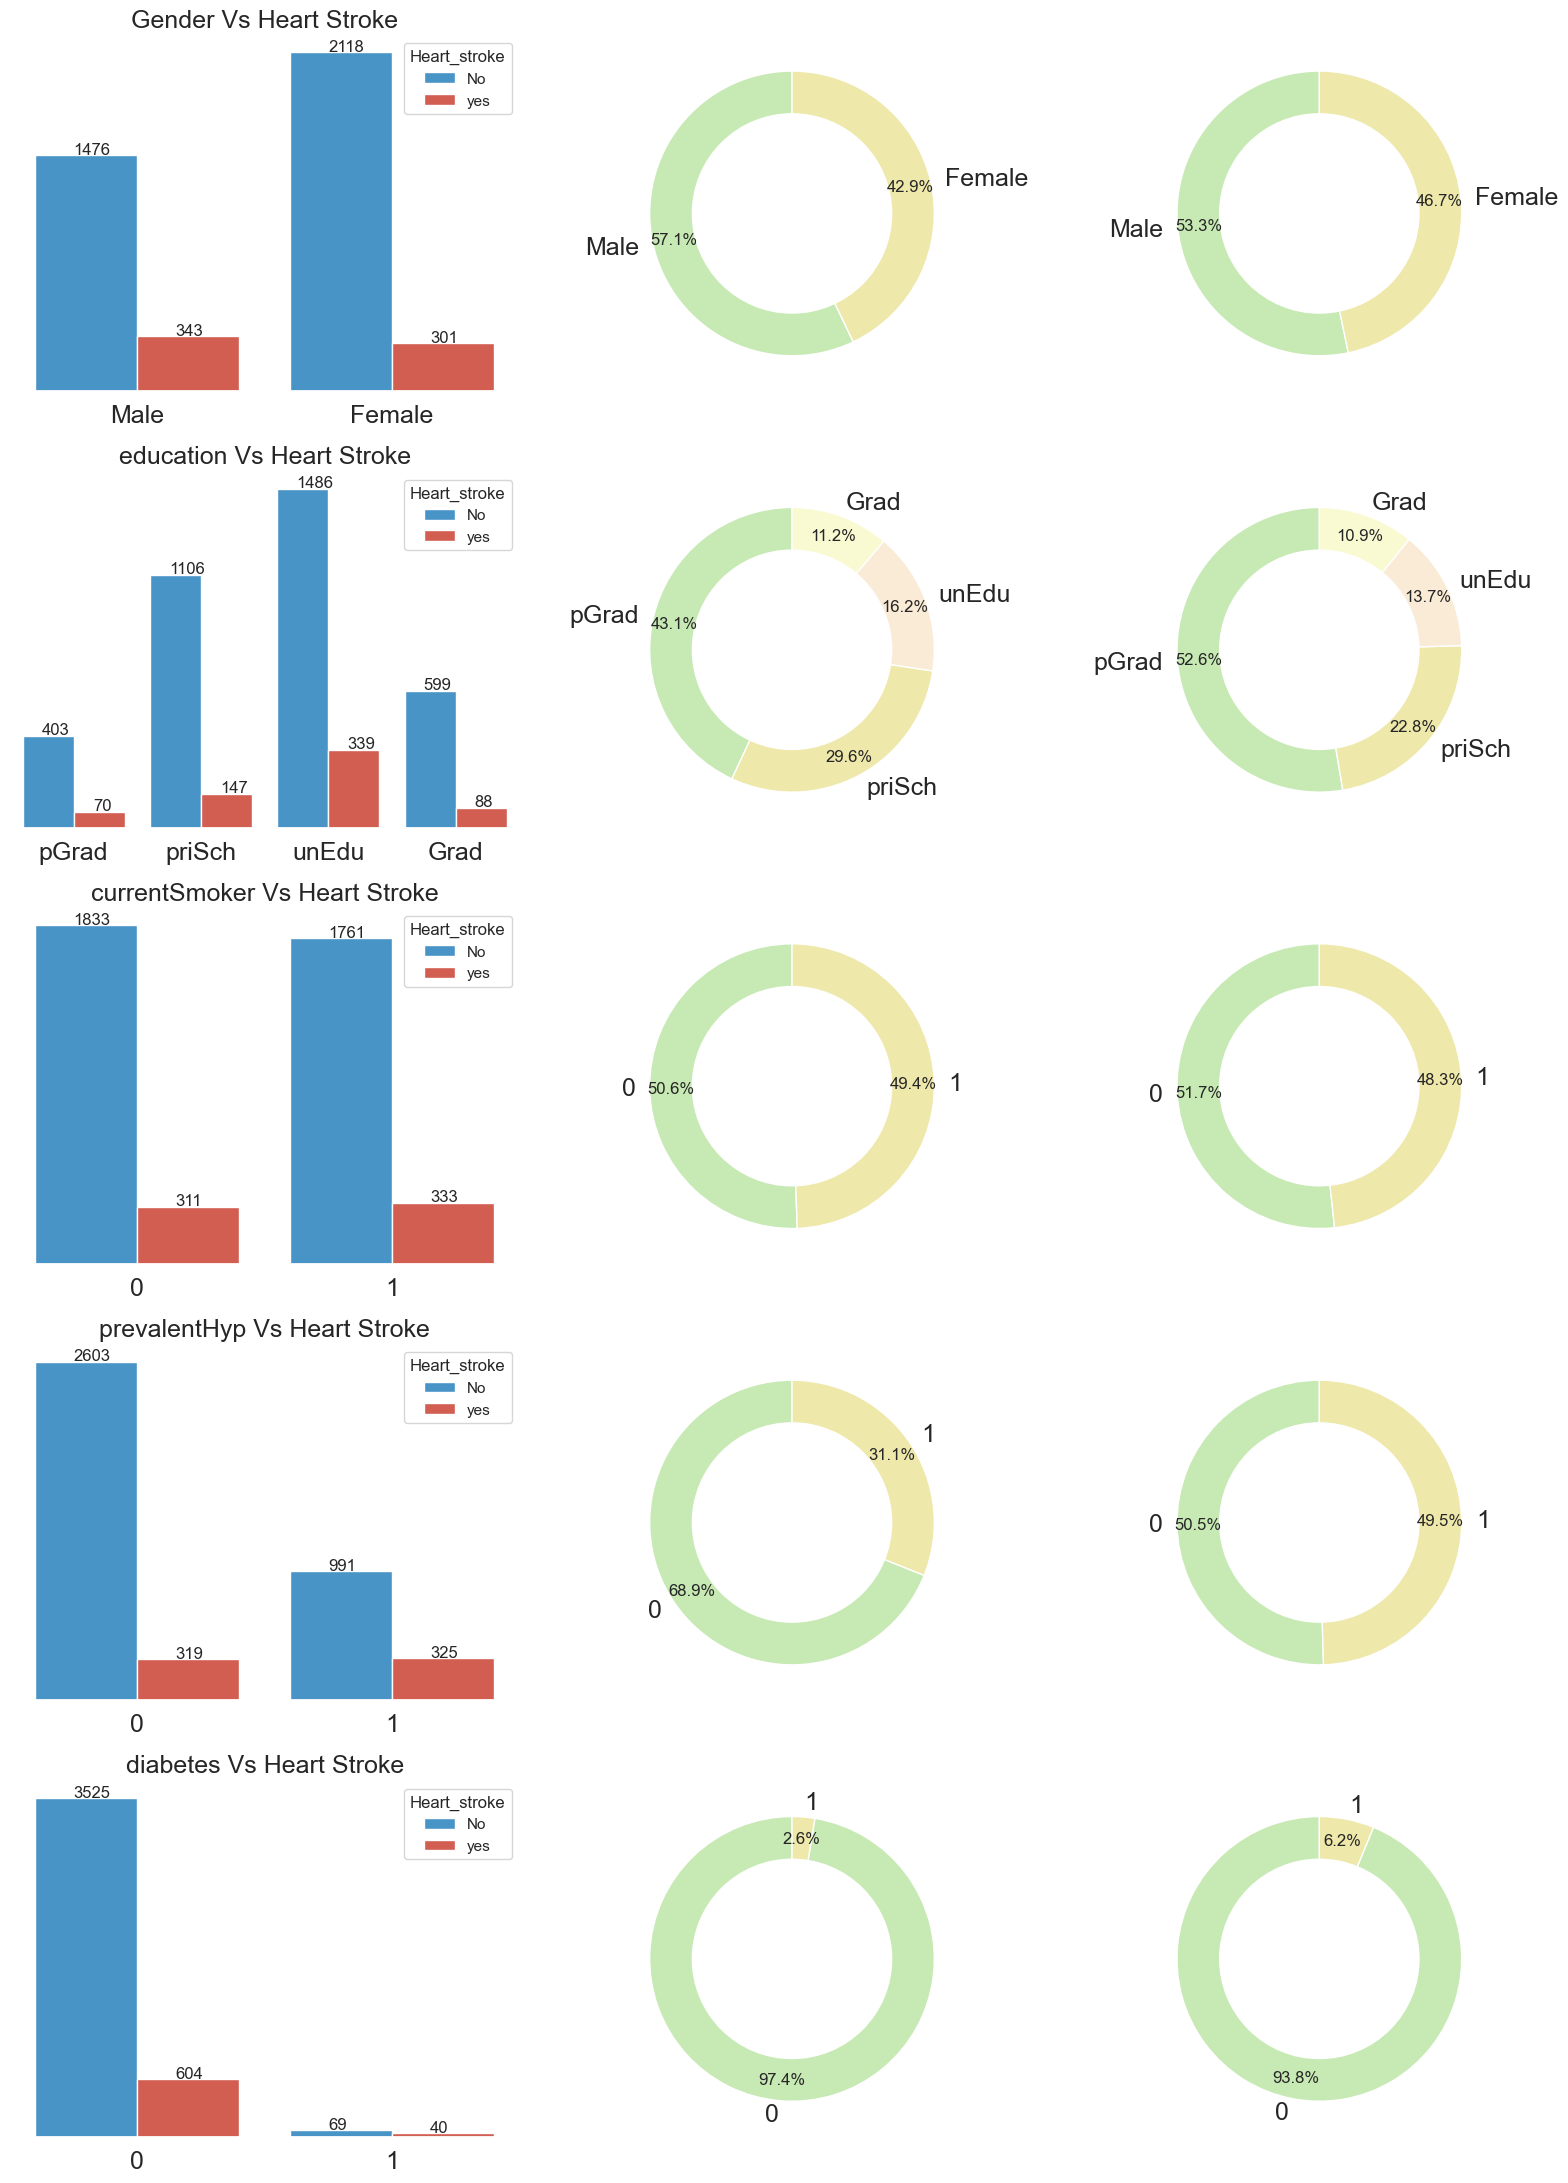

In [15]:
# Set up the visualization style and settings
sns.set(rc={'axes.facecolor': 'none', 'axes.grid': False, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'figure.autolayout': True})
plt.subplots(figsize=(16, 26))
my_col = ('#3498DB', '#E74C3C')  # Color scheme for count plots
my_pal = ('#c7e9b4', '#EEE8AA', '#FAEBD7', '#FAFAD2', '#F08080', '#F4A460')  # Color palette for donut plots

# List of categorical variables for visualization
cat_features = ['Gender', 'education', 'currentSmoker', 'prevalentHyp', 'diabetes']
cat_feature_labels = ['Gender', 'Education', 'Current Smoker', 'Prevalent Hypertension', 'Diabetes']

# Function to create a donut plot
def donut_plot(data, labels, colors, title):
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title, fontsize=18)

# Loop through categorical variables for visualization
for i, cat_feature in enumerate(cat_features, start=1):
    plt.subplot(6, 3, i * 3 - 2)
    plt.title(f'{cat_feature} Vs Heart Stroke', fontsize=18)
    ax = sns.countplot(x=cat_feature, hue='Heart_stroke', palette=my_col, data=df)
    for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 8))
    plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
    
    plt.subplot(6, 3, i * 3 - 1)
    plt.title(f'Total Patient Count by {cat_feature}', fontsize=18)
    donut_plot(df[cat_feature].value_counts(), df[cat_feature].unique(), my_pal, '')
    
    plt.subplot(6, 3, i * 3)
    plt.title(f'+Ve Patient Count by {cat_feature}', fontsize=18)
    donut_plot(df[df['Heart_stroke'] == "yes"][cat_feature].value_counts(), df[cat_feature].unique(), my_pal, '')

plt.tight_layout()
plt.show()


**Analysis**

1) Overall more female patients in dataset, but more males in positive target class

2) Uneducated group has highest rate of positive cases. 
   Education exhibits correlation, low education indicates higher risk

### Building Classification Models

In [16]:
# Label encoding categorical variables
le = LabelEncoder()

# Select categorical columns
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

# Join categorical data with numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

**code explanation**
1) Encodes categorical features using scikit-learn's LabelEncoder.
2) Transforms category labels into numeric values for modeling.
3) Joins encoded categories with existing numeric columns to prepare full dataset.

**Benefits**:
1) Allows using categorical data in machine learning models.
2) Converts categories to format algorithms can understand.
3) Retains information from categorical variables for training.

In [17]:
# Scaling the data
stdsca = StandardScaler()
minmaxsca = MinMaxScaler()

main_df[['age', 'prevalentHyp', 'totChol', 'diaBP', 'BMI', 'heartRate']] = stdsca.fit_transform(main_df[['age', 'prevalentHyp', 'totChol', 'diaBP', 'BMI', 'heartRate']])
main_df[['cigsPerDay', 'BPMeds', 'diabetes', 'sysBP', 'glucose', 'prevalentStroke']] = minmaxsca.fit_transform(main_df[['cigsPerDay', 'BPMeds', 'diabetes', 'sysBP', 'glucose', 'prevalentStroke']])


**Code explanation**
1) Scales numeric features using StandardScaler and MinMaxScaler.
2) Transforms data to comparable range for improved modeling.
3) Applies different scaling to appropriate columns based on data characteristics.

**Benefits**:
1) Normalizes data for input to machine learning models.
2) Handles skewed distribution and outliers in certain features.
3) Avoids features with larger ranges dominating others.

In [18]:
# Check feature correlation with the target variable
corr_matrix = main_df.corr()
corr_matrix['Heart_stroke'].sort_values(ascending=False)

Heart_stroke      1.00
age               0.23
sysBP             0.22
prevalentHyp      0.18
diaBP             0.15
glucose           0.12
diabetes          0.10
Gender            0.09
BPMeds            0.09
totChol           0.08
BMI               0.07
prevalentStroke   0.06
cigsPerDay        0.06
education         0.06
heartRate         0.02
currentSmoker     0.02
Name: Heart_stroke, dtype: float64

##### Age, systolic BP, hypertension history, and diastolic BP show strongest correlation. These features have the highest linear dependency with the target

In [19]:
# Segregating dependent and independent variables
X = main_df.drop(columns=["Heart_stroke", "currentSmoker", "heartRate", "education", "cigsPerDay", "prevalentStroke"])
y = main_df["Heart_stroke"]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

**Code explanation**
1) Splits features and target variable into X and y arrays.
2) Scales the data to normalize range of input variables.
3) Creates stratified train-test splits to maintain target balance.

**Benefits**:
1) Separates independent and dependent data needed for modeling.
2) Scaling helps algorithms learn and avoids distortion.
3) Stratified split gives representative subsets for training/testing.

##### For the code below we have a range of classifier models like KNN, SVM, Random Forest, and XGBoost on the training data. It evaluates each model by making predictions on the test set and scoring accuracy and log loss. The results are logged in a table for easy comparison of model performance.

The key benefits are:

Trains a diverse set of classification algorithms on the data.
Quantifies model performance using accuracy and log loss metrics.
Logs results in a DataFrame to visually compare different models.
Evaluating multiple classifiers provides insight into which machine learning algorithms can most effectively predict the target variable. Logging performance in a table allows easy visualization of the relative accuracy and loss of each model for model selection.

In [20]:
# Define and run classifier models
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier()]

# Logging for visual comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print('='*30, '\n')
    print(name, '\n')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print('='*30)


KNeighborsClassifier 

Accuracy: 78.89151%
Log Loss: 3.493

SVC 

Accuracy: 84.78774%
Log Loss: 0.42078

DecisionTreeClassifier 

Accuracy: 75.82547%
Log Loss: 8.7134

RandomForestClassifier 

Accuracy: 83.37264%
Log Loss: 0.42088

GaussianNB 

Accuracy: 80.77830%
Log Loss: 1.3179

LogisticRegression 

Accuracy: 85.49528%
Log Loss: 0.39217

XGBClassifier 

Accuracy: 83.13679%
Log Loss: 0.47079


1) The LogisticRegression model achieved the highest accuracy of 85.5% on the test set, indicating it learned the patterns well and was able to generalize to new data.

2) However, XGBoost had the lowest log loss of 0.47, meaning its predictions aligned very closely with the true target class probabilities.

3) SVM and Random Forest also performed well on both metrics, suggesting robust learning of feature relationships.

4) Naive Bayes had relatively poorer accuracy possibly due to violation of independence assumption between features.

5) KNeighborsClassifier struggled likely because linear assumptions do not fit this problem well.

Overall, LogisticRegression and XGBoost appear to be the top performing models for this dataset and problem. An ensemble of these complementary models may improve performance further.

Key factors when selecting the final model are calibration (log loss), discrimination ability (AUC), and interpretability if required. Additional optimization of model hyperparameters could also help improve results.

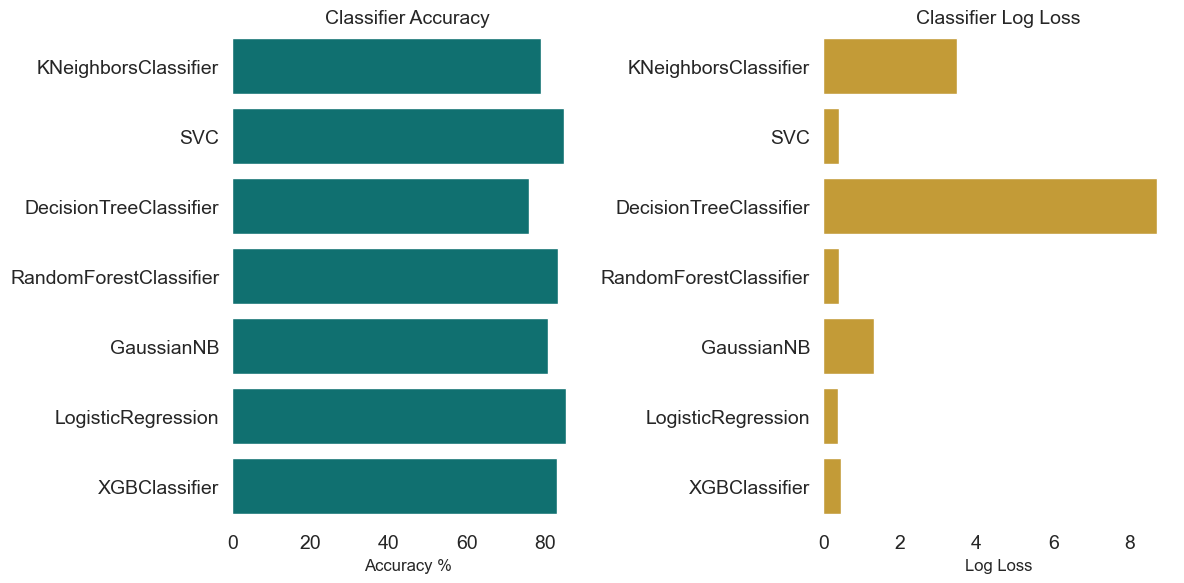

In [21]:
# Visualizing classifier accuracy and log loss
sns.set(rc={'axes.facecolor': 'none', 'axes.grid': False, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'figure.autolayout': True})
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.set_color_codes("pastel")  # Change color codes to "pastel"
sns.barplot(x='Accuracy', y='Classifier', data=log, color="teal")  # Change color to "teal"
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy', fontsize=14)
plt.ylabel(None)

plt.subplot(1, 2, 2)
sns.set_color_codes("pastel")  # Change color codes to "pastel"
sns.barplot(x='Log Loss', y='Classifier', data=log, color="goldenrod")  # Change color to "goldenrod"
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss', fontsize=14)
plt.ylabel(None)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


 **Observation**
 
LogisticRegression, RandomForest, and SVC emerge as top models. These classifiers achieved strongest combination of accuracy and log loss

In [22]:
# Confusion matrix for LogisticRegression
sns.set(rc={'axes.facecolor': 'none', 'axes.grid': False, 'xtick.labelsize': 11, 'ytick.labelsize': 11, 'figure.autolayout': True})

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_Log_Reg_training_set = clf.predict(X_train)
acc_Log_Reg = round(clf.score(X_train, y_train) * 100, 2)
print("Accuracy: %i %% \n" % acc_Log_Reg)

class_names = ['No', 'yes']

Accuracy: 85 % 



##### The code below calculates a confusion matrix comparing the true labels to the logistic regression predictions. It computes the matrix in counts and percentages, formatting them as DataFrames with intuitive class names. The matrices are plotted as annotated heatmaps to visualize the classifier's correct and incorrect predictions.

The key benefits are:

* Quantifies true/false positives and negatives from predictions.
* Visualizes model performance on each class as percentages.
* Enables identifying bias or errors towards particular classes.

Confusion Matrix (Values)
[[2855   20]
 [ 481   34]]


 Confusion Matrix (%)
[[0.99 0.01]
 [0.93 0.07]]



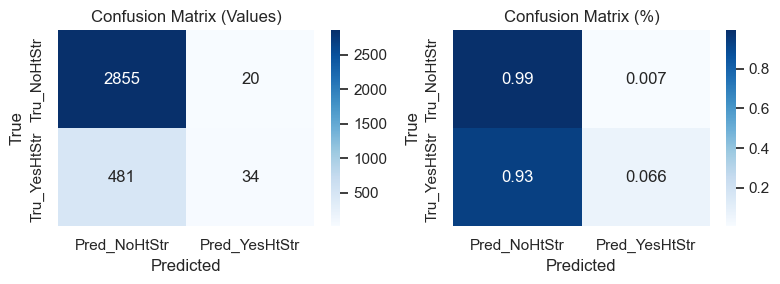

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_Log_Reg_training_set)
np.set_printoptions(precision=2)

print('Confusion Matrix (Values)')
print(cnf_matrix)
print('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print('\n', 'Confusion Matrix (%)')
print(cnf_matrix_percent)
print('')

true_class_names = ['Tru_NoHtStr', 'Tru_YesHtStr']
predicted_class_names = ['Pred_NoHtStr', 'Pred_YesHtStr']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index=true_class_names,
                             columns=predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index=true_class_names,
                                     columns=predicted_class_names)

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix (Values)", fontsize=12)
sns.heatmap(df_cnf_matrix, cmap="Blues", annot=True, fmt='d')  # Change cmap to "Blues"
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
plt.title("Confusion Matrix (%)", fontsize=12)
sns.heatmap(df_cnf_matrix_percent, cmap="Blues", annot=True)  # Change cmap to "Blues"
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


**Analysis**

* Looking at the confusion matrix, we can see the model performed very well at predicting the majority 'No Heart Disease' class, with 2,855 correct predictions and only 20 incorrect, corresponding to 99% accuracy.

* However, performance on the minority 'Heart Disease' class was significantly worse, with only 34 correct predictions compared to 481 incorrect, equaling just 7% accuracy.

* This severe skew indicates the model has substantial bias towards predicting the majority class and is not properly learning the patterns for identifying the minority class.

**Recommendation**

* Techniques to handle this imbalance can be employed, such as synthetic data generation for the under-represented class.

In [24]:
# Classification report for LogisticRegression
y_pred_ = clf.predict(X_test)
#print(classification_report)

print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       719
           1       0.75      0.07      0.13       129

    accuracy                           0.85       848
   macro avg       0.80      0.53      0.52       848
weighted avg       0.84      0.85      0.80       848



**Conclusion**
* The precision for the majority 'No Disease' class is high at 0.86, indicating the positive predictions were mostly correct.

* However, precision is poor for the minority 'Disease' class at 0.75, suggesting many incorrect positives.
* Recall is concerningly low for 'Disease' at 0.07, meaning the model failed to detect most of the actual positive cases. But recall is perfect for 'No Disease' at 1.0, so no issues identifying true negatives.

* The F1 scores reflect this imbalance, with 0.92 solid for 'No Disease' but very poor 0.13 for 'Disease'.

* Overall accuracy of 85% looks decent but is misleading with such skewed class performance.

* The large differences between precision, recall and F1 for the 'Disease' class highlight significant model shortcomings on the minority positive cases.